In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('/content/ds1.csv', delimiter=' ', header=None,
                   names=['Date', 'Time', 'HighLevelSensorID', 'LowLevelSensorID', 'SensorValue', 'Label'],
                   on_bad_lines='skip')

In [3]:
data

,Date,Time,HighLevelSensorID,LowLevelSensorID,SensorValue,Label
0,2009-07-17,15:49:51.750001,Kitchen,Kitchen,ON,Other_Activity
1,2009-07-17,15:49:52.406001,Kitchen,Kitchen,ON,Other_Activity
2,2009-07-17,15:49:55.421001,Kitchen,Kitchen,OFF,Other_Activity
3,2009-07-17,15:49:56.406001,Kitchen,Kitchen,OFF,Other_Activity
4,2009-07-17,15:49:58.031001,GuestRoom,Hall,ON,Other_Activity
...,...,...,...,...,...,...
99995,2009-08-20,12:16:04.093001,Kitchen,Kitchen,ON,Cook
99996,2009-08-20,12:16:08.031001,Kitchen,Kitchen,OFF,Cook
99997,2009-08-20,12:16:10.687001,Kitchen,Kitchen,ON,Cook
99998,2009-08-20,12:16:14.625001,Kitchen,Kitchen,OFF,Cook


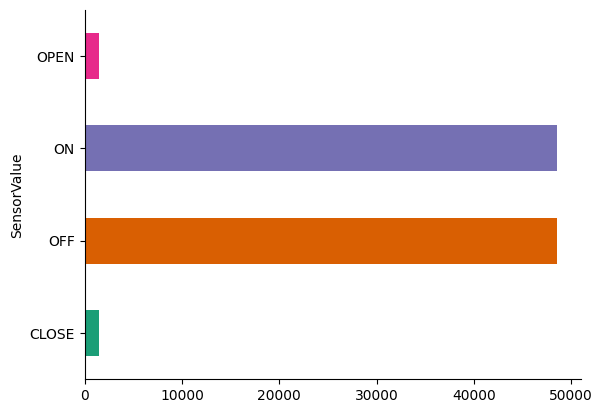

In [4]:
# @title SensorValue

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('SensorValue').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
data.isnull().sum()

Date                 0
Time                 0
HighLevelSensorID    0
LowLevelSensorID     0
SensorValue          0
Label                0
dtype: int64

In [6]:
def process_datetime(df):
    df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
    df['Date'] = pd.to_datetime(df['Date'])
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S.%f').dt.time
    df['Hour'] = df['DateTime'].dt.hour
    df['Minute'] = df['DateTime'].dt.minute
    df['Second'] = df['DateTime'].dt.second
    df['Microsecond'] = df['DateTime'].dt.microsecond
    return df

In [7]:
process_datetime(data)

,Date,Time,HighLevelSensorID,LowLevelSensorID,SensorValue,Label,DateTime,Hour,Minute,Second,Microsecond
0,2009-07-17,15:49:51.750001,Kitchen,Kitchen,ON,Other_Activity,2009-07-17 15:49:51.750001,15,49,51,750001
1,2009-07-17,15:49:52.406001,Kitchen,Kitchen,ON,Other_Activity,2009-07-17 15:49:52.406001,15,49,52,406001
2,2009-07-17,15:49:55.421001,Kitchen,Kitchen,OFF,Other_Activity,2009-07-17 15:49:55.421001,15,49,55,421001
3,2009-07-17,15:49:56.406001,Kitchen,Kitchen,OFF,Other_Activity,2009-07-17 15:49:56.406001,15,49,56,406001
4,2009-07-17,15:49:58.031001,GuestRoom,Hall,ON,Other_Activity,2009-07-17 15:49:58.031001,15,49,58,31001
...,...,...,...,...,...,...,...,...,...,...,...
99995,2009-08-20,12:16:04.093001,Kitchen,Kitchen,ON,Cook,2009-08-20 12:16:04.093001,12,16,4,93001
99996,2009-08-20,12:16:08.031001,Kitchen,Kitchen,OFF,Cook,2009-08-20 12:16:08.031001,12,16,8,31001
99997,2009-08-20,12:16:10.687001,Kitchen,Kitchen,ON,Cook,2009-08-20 12:16:10.687001,12,16,10,687001
99998,2009-08-20,12:16:14.625001,Kitchen,Kitchen,OFF,Cook,2009-08-20 12:16:14.625001,12,16,14,625001


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date               100000 non-null  datetime64[ns]
 1   Time               100000 non-null  object        
 2   HighLevelSensorID  100000 non-null  object        
 3   LowLevelSensorID   100000 non-null  object        
 4   SensorValue        100000 non-null  object        
 5   Label              100000 non-null  object        
 6   DateTime           100000 non-null  datetime64[ns]
 7   Hour               100000 non-null  int32         
 8   Minute             100000 non-null  int32         
 9   Second             100000 non-null  int32         
 10  Microsecond        100000 non-null  int32         
dtypes: datetime64[ns](2), int32(4), object(5)
memory usage: 6.9+ MB


In [9]:
data.head(10)

,Date,Time,HighLevelSensorID,LowLevelSensorID,SensorValue,Label,DateTime,Hour,Minute,Second,Microsecond
0,2009-07-17,15:49:51.750001,Kitchen,Kitchen,ON,Other_Activity,2009-07-17 15:49:51.750001,15,49,51,750001
1,2009-07-17,15:49:52.406001,Kitchen,Kitchen,ON,Other_Activity,2009-07-17 15:49:52.406001,15,49,52,406001
2,2009-07-17,15:49:55.421001,Kitchen,Kitchen,OFF,Other_Activity,2009-07-17 15:49:55.421001,15,49,55,421001
3,2009-07-17,15:49:56.406001,Kitchen,Kitchen,OFF,Other_Activity,2009-07-17 15:49:56.406001,15,49,56,406001
4,2009-07-17,15:49:58.031001,GuestRoom,Hall,ON,Other_Activity,2009-07-17 15:49:58.031001,15,49,58,31001
5,2009-07-17,15:50:02.031001,GuestRoom,Hall,OFF,Other_Activity,2009-07-17 15:50:02.031001,15,50,2,31001
6,2009-07-17,15:50:06.328001,LivingRoom,LivingRoom,ON,Other_Activity,2009-07-17 15:50:06.328001,15,50,6,328001
7,2009-07-17,15:50:10.609001,LivingRoom,LivingRoom,OFF,Other_Activity,2009-07-17 15:50:10.609001,15,50,10,609001
8,2009-07-17,15:50:15.500001,LivingRoom,LivingRoom,ON,Other_Activity,2009-07-17 15:50:15.500001,15,50,15,500001
9,2009-07-17,15:50:19.140001,GuestRoom,Hall,ON,Other_Activity,2009-07-17 15:50:19.140001,15,50,19,140001


In [10]:
def create_sequences(df, sequence_length):
    sequences = []
    for i in range(0, len(df) - sequence_length + 1, sequence_length):
        sequence = df.iloc[i:i+sequence_length].copy()
        sequences.append(sequence)
    return sequences

# Choose an appropriate sequence length
sequence_length = 50  # Adjust this based on your needs

positive_sequences = create_sequences(data, sequence_length)

# Add target variable (1 for positive cases)
positive_targets = [1] * len(positive_sequences)
positive_targets
positive_sequences[2]

,Date,Time,HighLevelSensorID,LowLevelSensorID,SensorValue,Label,DateTime,Hour,Minute,Second,Microsecond
100,2009-07-17,16:12:20.437001,Kitchen,Kitchen,ON,Other_Activity,2009-07-17 16:12:20.437001,16,12,20,437001
101,2009-07-17,16:12:24.312001,Kitchen,Kitchen,OFF,Other_Activity,2009-07-17 16:12:24.312001,16,12,24,312001
102,2009-07-17,16:12:34.218001,GuestRoom,Hall,ON,Other_Activity,2009-07-17 16:12:34.218001,16,12,34,218001
103,2009-07-17,16:12:38.515001,GuestRoom,Hall,OFF,Other_Activity,2009-07-17 16:12:38.515001,16,12,38,515001
104,2009-07-17,16:12:43.828001,DiningRoom,DiningRoom,ON,Other_Activity,2009-07-17 16:12:43.828001,16,12,43,828001
105,2009-07-17,16:12:47.437001,DiningRoom,DiningRoom,OFF,Other_Activity,2009-07-17 16:12:47.437001,16,12,47,437001
106,2009-07-17,16:12:49.703001,DiningRoom,DiningRoom,ON,Other_Activity,2009-07-17 16:12:49.703001,16,12,49,703001
107,2009-07-17,16:12:54.015001,DiningRoom,DiningRoom,OFF,Other_Activity,2009-07-17 16:12:54.015001,16,12,54,15001
108,2009-07-17,16:13:20.765001,DiningRoom,DiningRoom,ON,Other_Activity,2009-07-17 16:13:20.765001,16,13,20,765001
109,2009-07-17,16:13:24.703001,DiningRoom,DiningRoom,OFF,Other_Activity,2009-07-17 16:13:24.703001,16,13,24,703001


In [11]:
def create_negative_sequences(df, sequence_length, num_sequences):
    negative_sequences = []
    for _ in range(num_sequences):
        shuffled_df = df.sample(n=sequence_length).reset_index(drop=True)
        negative_sequences.append(shuffled_df)
    return negative_sequences

# Create an equal number of negative sequences
negative_sequences = create_negative_sequences(data, sequence_length, len(positive_sequences))

# Add target variable (0 for negative cases)
negative_targets = [0] * len(negative_sequences)

In [12]:
all_sequences = positive_sequences + negative_sequences
all_targets = positive_targets + negative_targets

# Convert to numpy arrays
X = np.array(all_sequences)
y = np.array(all_targets)

In [13]:
X[:1,:]

array([[[Timestamp('2009-07-17 00:00:00'),
         datetime.time(15, 49, 51, 750001), 'Kitchen', 'Kitchen', 'ON',
         'Other_Activity', Timestamp('2009-07-17 15:49:51.750001'), 15,
         49, 51, 750001],
        [Timestamp('2009-07-17 00:00:00'),
         datetime.time(15, 49, 52, 406001), 'Kitchen', 'Kitchen', 'ON',
         'Other_Activity', Timestamp('2009-07-17 15:49:52.406001'), 15,
         49, 52, 406001],
        [Timestamp('2009-07-17 00:00:00'),
         datetime.time(15, 49, 55, 421001), 'Kitchen', 'Kitchen', 'OFF',
         'Other_Activity', Timestamp('2009-07-17 15:49:55.421001'), 15,
         49, 55, 421001],
        [Timestamp('2009-07-17 00:00:00'),
         datetime.time(15, 49, 56, 406001), 'Kitchen', 'Kitchen', 'OFF',
         'Other_Activity', Timestamp('2009-07-17 15:49:56.406001'), 15,
         49, 56, 406001],
        [Timestamp('2009-07-17 00:00:00'),
         datetime.time(15, 49, 58, 31001), 'GuestRoom', 'Hall', 'ON',
         'Other_Activity', Timest

In [14]:
X.shape

(4000, 50, 11)

In [15]:
X[600][0]

array([Timestamp('2009-07-27 00:00:00'),
       datetime.time(14, 21, 20, 187001), 'Kitchen', 'Kitchen', 'ON',
       'Cook', Timestamp('2009-07-27 14:21:20.187001'), 14, 21, 20,
       187001], dtype=object)

In [16]:
target_value = y[0]
print(f"The target value for X[0] is: {target_value}")

The target value for X[0] is: 1


In [17]:
# Assuming this data point is from sequence i
sequence_index =  3000 # You need to determine this based on your data structure
target_value = y[sequence_index]
print(f"The target value for the sequence containing this data point is: {target_value}")

The target value for the sequence containing this data point is: 0


In [18]:
# Create a dictionary where keys are sequence indices and values are (sequence, target) tuples
combined_data_dict = {i: (sequence, target) for i, (sequence, target) in enumerate(zip(X, y))}

# To access data:
for i in range(1999,2002):  # Show first 5 for example
    sequence, target = combined_data_dict[i]
    print(f"Sequence {i}:")
    print(f"  Shape: {sequence.shape}")
    print(f"  First event: {sequence[0]}")
    print(f"  Target: {target}")
    print()

Sequence 1999:
  Shape: (50, 11)
  First event: [Timestamp('2009-08-20 00:00:00') datetime.time(12, 12, 49, 750001)
 'Kitchen' 'Kitchen' 'ON' 'Cook' Timestamp('2009-08-20 12:12:49.750001')
 12 12 49 750001]
  Target: 1

Sequence 2000:
  Shape: (50, 11)
  First event: [Timestamp('2009-08-18 00:00:00') datetime.time(11, 3, 13, 328001)
 'DiningRoom' 'DiningRoom' 'ON' 'Eat'
 Timestamp('2009-08-18 11:03:13.328001') 11 3 13 328001]
  Target: 0

Sequence 2001:
  Shape: (50, 11)
  First event: [Timestamp('2009-08-17 00:00:00') datetime.time(9, 8, 28, 984001)
 'GuestRoom' 'Hall' 'ON' 'Other_Activity'
 Timestamp('2009-08-17 09:08:28.984001') 9 8 28 984001]
  Target: 0



In [19]:
counts = np.bincount(y)
for value, count in enumerate(counts):
    print(f"{value}: {count}")

0: 2000
1: 2000


In [20]:
# First, let's create lists of sequences and targets
sequences = [seq for seq, _ in combined_data_dict.values()]
targets = [target for _, target in combined_data_dict.values()]

# Convert to numpy arrays if they aren't already
X = np.array(sequences)
y = np.array(targets)

# First, split into train+val and test sets (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Then split train+val into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)

# Print the shapes of the resulting sets
print(f"Training set shape: {X_train.shape}, Target shape: {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, Target shape: {y_val.shape}")
print(f"Test set shape: {X_test.shape}, Target shape: {y_test.shape}")

# Print class distribution in each set
print("\nClass distribution:")
print(f"Training set: {np.bincount(y_train)}")
print(f"Validation set: {np.bincount(y_val)}")
print(f"Test set: {np.bincount(y_test)}")

# Create new combined data dictionaries for each set
train_dict = {i: (seq, target) for i, (seq, target) in enumerate(zip(X_train, y_train))}
val_dict = {i: (seq, target) for i, (seq, target) in enumerate(zip(X_val, y_val))}
test_dict = {i: (seq, target) for i, (seq, target) in enumerate(zip(X_test, y_test))}

# Print a sample from each set
print("\nSample from training set:")
seq, target = next(iter(train_dict.values()))
print(f"Sequence shape: {seq.shape}, Target: {target}")
print("First event:", seq[0])

print("\nSample from validation set:")
seq, target = next(iter(val_dict.values()))
print(f"Sequence shape: {seq.shape}, Target: {target}")
print("First event:", seq[0])

print("\nSample from test set:")
seq, target = next(iter(test_dict.values()))
print(f"Sequence shape: {seq.shape}, Target: {target}")
print("First event:", seq[0])

Training set shape: (2560, 50, 11), Target shape: (2560,)
Validation set shape: (640, 50, 11), Target shape: (640,)
Test set shape: (800, 50, 11), Target shape: (800,)

Class distribution:
Training set: [1280 1280]
Validation set: [320 320]
Test set: [400 400]

Sample from training set:
Sequence shape: (50, 11), Target: 1
First event: [Timestamp('2009-07-25 00:00:00') datetime.time(13, 1, 46, 375001)
 'Kitchen' 'Kitchen' 'ON' 'Cook' Timestamp('2009-07-25 13:01:46.375001')
 13 1 46 375001]

Sample from validation set:
Sequence shape: (50, 11), Target: 0
First event: [Timestamp('2009-07-19 00:00:00') datetime.time(6, 21, 57, 593001)
 'GuestRoom' 'Hall' 'OFF' 'Other_Activity'
 Timestamp('2009-07-19 06:21:57.593001') 6 21 57 593001]

Sample from test set:
Sequence shape: (50, 11), Target: 1
First event: [Timestamp('2009-08-16 00:00:00') datetime.time(4, 43, 44, 218001)
 'Bedroom' 'Bed' 'OFF' 'Sleep' Timestamp('2009-08-16 04:43:44.218001') 4
 43 44 218001]


In [23]:
def check_data_types(arr, name):
    print(f"Checking {name}:")
    print(f"Shape: {arr.shape}")
    print(f"Data type: {arr.dtype}")
    if arr.dtype == object:
        for i, row in enumerate(arr):
            for j, elem in enumerate(row):
                if not isinstance(elem, (int, float, np.integer, np.floating)):
                    print(f"Non-numeric element found at index [{i}, {j}]: {type(elem)}")
                    print(f"Value: {elem}")
                    return False
    return True

# Check your data
# check_data_types(X_train_processed, "X_train_processed")
# check_data_types(y_train, "y_train")
# check_data_types(X_val_processed, "X_val_processed")
# check_data_types(y_val, "y_val")

Checking X_train_processed:
Shape: (2560, 50, 10)
Data type: float64
Checking y_train:
Shape: (2560,)
Data type: float64
Checking X_val_processed:
Shape: (640, 50, 10)
Data type: float64
Checking y_val:
Shape: (640,)
Data type: float64


True

In [22]:
def preprocess_sequence(sequence):
    processed_sequence = []
    for event in sequence:
        # Convert Timestamp to Unix timestamp (seconds since epoch)
        date = pd.Timestamp(event[0]).timestamp()
        time = (event[1].hour * 3600 + event[1].minute * 60 + event[1].second + event[1].microsecond / 1e6)

        # One-hot encode categorical variables
        high_level_sensor = pd.get_dummies(pd.Series(event[2])).values[0]
        low_level_sensor = pd.get_dummies(pd.Series(event[3])).values[0]
        sensor_value = 1 if event[4] == 'ON' else 0
        label = pd.get_dummies(pd.Series(event[5])).values[0]

        # Combine all features
        processed_event = np.concatenate([
            [date, time],
            high_level_sensor,
            low_level_sensor,
            [sensor_value],
            label,
            event[7:].astype(float)  # Convert the rest to float
        ]).astype(float)  # Ensure all elements are float
        processed_sequence.append(processed_event)
    return np.array(processed_sequence)

# Preprocess all sequences
X_train_processed = np.array([preprocess_sequence(seq) for seq in X_train])
X_val_processed = np.array([preprocess_sequence(seq) for seq in X_val])
X_test_processed = np.array([preprocess_sequence(seq) for seq in X_test])

# Convert targets to float
y_train = y_train.astype(float)
y_val = y_val.astype(float)
y_test = y_test.astype(float)

# Check data types again
check_data_types(X_train_processed, "X_train_processed")
check_data_types(y_train, "y_train")
check_data_types(X_val_processed, "X_val_processed")
check_data_types(y_val, "y_val")

Checking X_train_processed:
Shape: (2560, 50, 10)
Data type: float64
Checking y_train:
Shape: (2560,)
Data type: float64
Checking X_val_processed:
Shape: (640, 50, 10)
Data type: float64
Checking y_val:
Shape: (640,)
Data type: float64


True

In [25]:
_, sequence_length, num_features = X_train_processed.shape

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

def create_model():
    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True), input_shape=(sequence_length, num_features)),
        Dropout(0.2),
        Bidirectional(LSTM(32)),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Create and summarize the model
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 50, 128)           38400     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 50, 128)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 1)                 1

In [28]:
# Train the model
history = model.fit(X_train_processed, y_train,
                    validation_data=(X_val_processed, y_val),
                    epochs=10,
                    batch_size=32,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_processed, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/10
80/80 [==============================] - 1s 14ms/step - loss: 0.6950 - accuracy: 0.4910 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
80/80 [==============================] - 1s 17ms/step - loss: 0.6945 - accuracy: 0.4961 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 3/10
80/80 [==============================] - 2s 19ms/step - loss: 0.6944 - accuracy: 0.5082 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/10
80/80 [==============================] - 1s 14ms/step - loss: 0.6936 - accuracy: 0.5012 - val_loss: 0.6970 - val_accuracy: 0.5000
Epoch 5/10
80/80 [==============================] - 1s 13ms/step - loss: 0.6941 - accuracy: 0.5043 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Test accuracy: 0.5000


In [30]:
# Make predictions on the test set
# Preprocess X_test first
X_test_processed = np.array([preprocess_sequence(seq) for seq in X_test])

y_pred = model.predict(X_test_processed)  # Use the processed test data
y_pred_classes = (y_pred > 0.5).astype(int).flatten()

# ... rest of your code ...

25/25 [==============================] - 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       400
         1.0       0.50      1.00      0.67       400

    accuracy                           0.50       800
   macro avg       0.25      0.50      0.33       800
weighted avg       0.25      0.50      0.33       800

Confusion Matrix:
[[  0 400]
 [  0 400]]


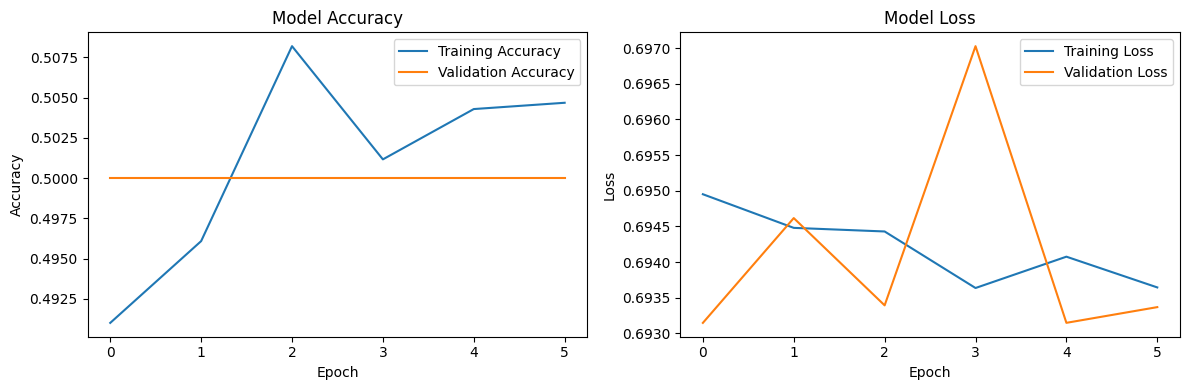

In [33]:


# Calculate additional metrics
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       400
         1.0       0.50      1.00      0.67       400

    accuracy                           0.50       800
   macro avg       0.25      0.50      0.33       800
weighted avg       0.25      0.50      0.33       800

Confusion Matrix:
[[  0 400]
 [  0 400]]


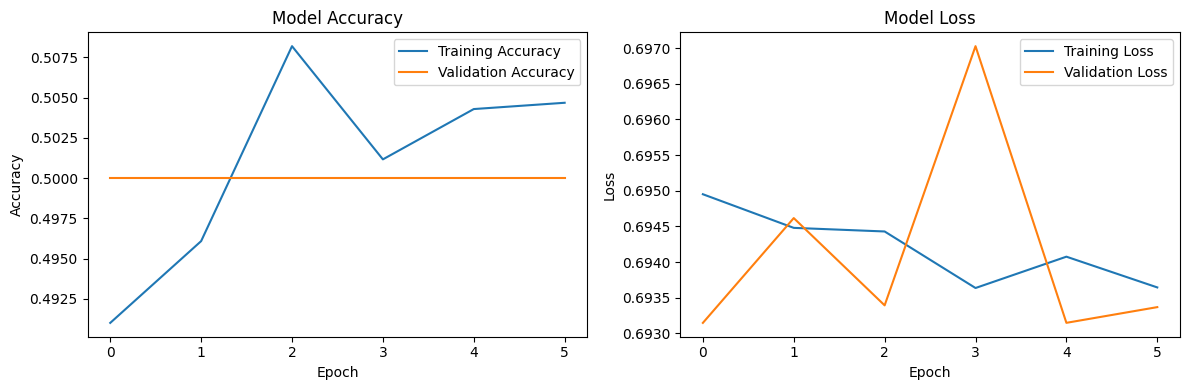

In [35]:


# Calculate additional metrics
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()